# 10.5 AVERAGE OVER MANY DRAWS

Use this notebook to store your work for this problem.

In [24]:
#*************************************************************
# Mario Segura
# Problem 10.5

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Random

from numpy.random import default_rng
rng = default_rng()
rand = rng.random

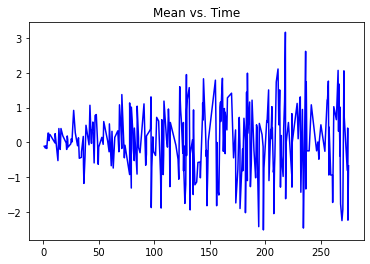

In [25]:
Cycles = 150
mean = []

for i in range(300):
    Loc_Array = []
    
    for n in range(Cycles):
        
        Beta = 1
        N = 300
        U = rand(N)

        y = -np.log(U)
        t = y/Beta

        Time = t.cumsum()

        Xi = 0.5

        Steps = 2*(rand(N) < Xi) - 1
        Location = Steps.cumsum()

        Loc_Array = np.append(Loc_Array, Location[i])
        Mean_Cycles = np.mean(Loc_Array)
        
    mean = np.append(mean, Mean_Cycles)
    
plt.plot(Time, mean, 'b-')
plt.title("Mean vs. Time");

***REPLACE WITH YOUR COMMENTS.***